In [1]:
import pandas as pd
import numpy as np
import pymongo
import math
import seaborn as sns
from pymongo import MongoClient
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as py
py.init_notebook_mode(connected=True)
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans,AgglomerativeClustering

In [2]:
client = MongoClient("mongodb://192.168.0.96:27017/")
db = client.stocks
collection_stocks = db.stocks
collection_snapshot = db.snapshot

df_hrb = pd.DataFrame(list(collection_stocks.find({'Ticker':'HRB'})))
df_all = pd.DataFrame(list(collection_snapshot.find()))
df_aapl = pd.DataFrame(list(collection_stocks.find({'Ticker':'AAPL'})))
df_nvda = pd.DataFrame(list(collection_stocks.find({'Ticker':'NVDA'})))

df_aapl.head()

Company Industry Classification Code                   Indicator Name  \
0                                101001  Avg. Diluted Shares Outstanding   
1                                101001                         Revenues   
2                                101001                             COGS   
3                                101001                             SG&A   
4                                101001                              R&D   

  Indicator Value  SimFin ID Ticker                       _id        date  
0      6322169.00     111052   AAPL  5be90b7807d0610510879e75  2008-06-30  
1         7464.00     111052   AAPL  5be90b7807d0610510879e76  2008-06-30  
2         4864.00     111052   AAPL  5be90b7807d0610510879e77  2008-06-30  
3          916.00     111052   AAPL  5be90b7807d0610510879e78  2008-06-30  
4          292.00     111052   AAPL  5be90b7807d0610510879e79  2008-06-30

In [3]:
# df_hrb.to_csv("df_hrb.csv", index=False)
# df_all.to_csv("df_all.csv", index=False)
# df_aapl.to_csv("df_aapl.csv", index=False)
# df_nvda.to_csv("df_nvda.csv", index=False)

In [5]:
# df_all = pd.read_csv("df_all.csv")
# df_hrb = pd.read_csv("df_hrb.csv")
df_all.head()

Company Industry Classification Code Ticker                       _id  \
0                                100006    AAL  5c0de5916f0304436853a85c   
1                                100006    AAL  5c0de5926f0304436853a85d   
2                                100006    AAL  5c0de5926f0304436853a85e   
3                                100006    AAL  5c0de5926f0304436853a85f   
4                                100006    AAL  5c0de5926f0304436853a860   

         date      debt    growth  health  price        returns     value  
0  2014-03-31  0.730329   9995.00   313.0  35.15  219178.104531  0.047596  
1  2014-06-30  0.562704  11355.00   -23.0  41.26  105726.908507  0.034407  
2  2014-09-30  0.697508  11139.00  -139.0  34.16   94749.577925  0.026010  
3  2014-12-31  0.490841  10161.00    18.0  51.76  147451.780360  0.060573  
4  2015-03-31  0.534240   9827.00  -708.0  51.05  168596.267138  0.038003

In [6]:
df_all_prob = df_all.groupby('Ticker').aggregate({'Ticker':'count'})
py.iplot([go.Histogram(x=df_all_prob.index, y=df_all_prob['Ticker'], histnorm='probability')])

In [7]:
data = go.Scatter(
                x = df_all[df_all['Ticker']=='AAL']['date'].values,
                y = df_all[df_all['Ticker']=='AAL']['value'].values,
                name = 'AAL',
                mode = 'markers',
)

layout = dict(
    xaxis=dict(
        rangeslider = dict(visible = True),
        type='date'
    )
)


fig = go.Figure(data=[data], layout = layout)
py.iplot(fig)


In [8]:
df_all['date'] = pd.to_datetime(df_all['date'])
df_all['date'] = df_all['date'].apply(datetime.toordinal)

df_all = df_all.dropna()
df_all = df_all.round(2)

In [10]:
df_all.head()

Company Industry Classification Code Ticker                       _id  \
0                                100006    AAL  5c0de5916f0304436853a85c   
1                                100006    AAL  5c0de5926f0304436853a85d   
2                                100006    AAL  5c0de5926f0304436853a85e   
3                                100006    AAL  5c0de5926f0304436853a85f   
4                                100006    AAL  5c0de5926f0304436853a860   

     date  debt    growth  health  price    returns  value  
0  735323  0.73   9995.00   313.0  35.15  219178.10   0.05  
1  735414  0.56  11355.00   -23.0  41.26  105726.91   0.03  
2  735506  0.70  11139.00  -139.0  34.16   94749.58   0.03  
3  735598  0.49  10161.00    18.0  51.76  147451.78   0.06  
4  735688  0.53   9827.00  -708.0  51.05  168596.27   0.04

In [11]:
features_reg = df_all.drop(['Company Industry Classification Code','Ticker','_id','price','returns','value'],axis=1)
features_reg = StandardScaler().fit_transform(features_reg)
labels_reg = np.array(df_all['price']).reshape(-1,1)
# labels_reg = StandardScaler().fit_transform(labels_reg)
feature_train_reg, feature_test_reg, label_train_reg, label_test_reg = train_test_split(
    features_reg, labels_reg, test_size = 0.2)

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.



In [12]:
features_reg

array([[-1.59244379, -0.01903475,  1.13167416,  0.10870294],
       [-1.33711763, -0.01904041,  1.33726408, -0.01433159],
       [-1.07898569, -0.01903575,  1.30461156, -0.0568078 ],
       ...,
       [-1.07898569, -0.01905806, -0.37859479, -0.00578508],
       [-0.82085375, -0.01905673, -0.37892842, -0.00605239],
       [ 1.7380194 , -0.01905706, -0.37849834, -0.00522118]])

In [13]:
def predict_reg_method(feature_train, label_train, feature_test, label_test, model):
    model.fit(feature_train,label_train)
    predict_output = model.predict(feature_test)
    return r2_score(label_test,predict_output), predict_output

In [14]:
r2_score_dtr, pred_dtr = predict_reg_method(feature_train_reg, label_train_reg, feature_test_reg, label_test_reg,
                                            DecisionTreeRegressor())
print("Decision Tree Regressor :", math.sqrt(mean_squared_error(label_test_reg,pred_dtr)))
print("r2_score :",r2_score_dtr)

r2_score_rft, pred_rft = predict_reg_method(feature_train_reg, label_train_reg, feature_test_reg, label_test_reg,
                                            RandomForestRegressor(n_estimators = 10))
print("\nRandom Forest Tree :", math.sqrt(mean_squared_error(label_test_reg,pred_rft)))
print("r2_score :",r2_score_rft)

r2_score_lnr, pred_lnr = predict_reg_method(feature_train_reg, label_train_reg, feature_test_reg, label_test_reg,
                                            LinearRegression())
print("\nLinear Regression :", math.sqrt(mean_squared_error(label_test_reg,pred_lnr)))
print("r2_score :",r2_score_lnr)

Decision Tree Regressor : 10871.476812274967
r2_score : -0.0017225456048262089


C:\Users\Ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




Random Forest Tree : 7961.979857968069
r2_score : 0.4627053578312357

Linear Regression : 10236.297125832385
r2_score : 0.11191174250276059


TypeError: unhashable type: 'numpy.ndarray'

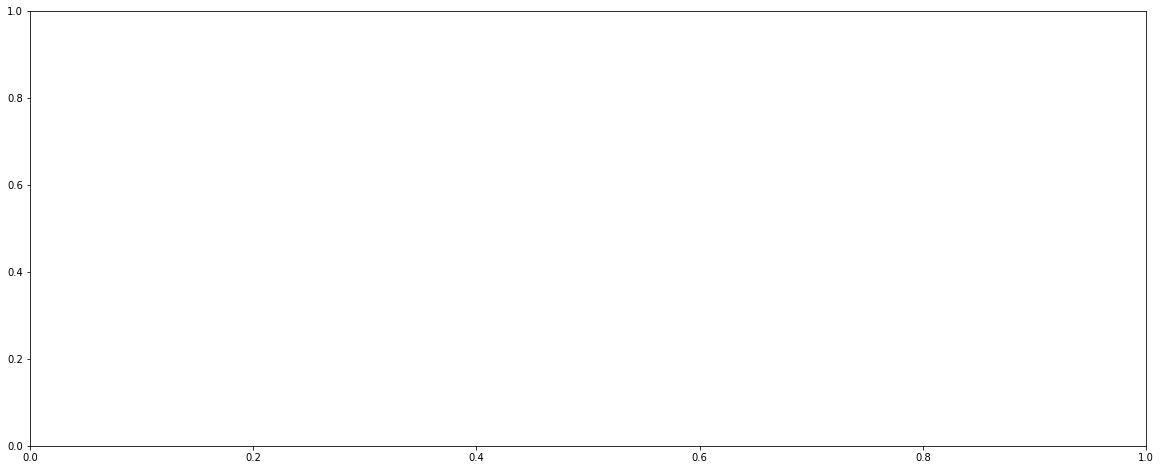

In [15]:
plt.figure(figsize=(20,8))
plt.plot(range(0,len(label_test_reg))[:50], label_test_reg[:50], color='#2c3e50', label='Expected')
plt.plot(range(0,len(label_test_reg))[:50], pred_dtr[:50], color='#2980b9', label='Decision Forest Tree')
plt.plot(range(0,len(label_test_reg))[:50], pred_rft[:50], color='#27ae60', label='Random Forest Regressor')
plt.plot(range(0,len(label_test_reg))[:50], pred_lnr[:50], color='#c0392b', label='Linear Regression')
plt.title('Regression')
plt.xlabel('Examples')
plt.ylabel('Classified Output')
plt.legend()
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

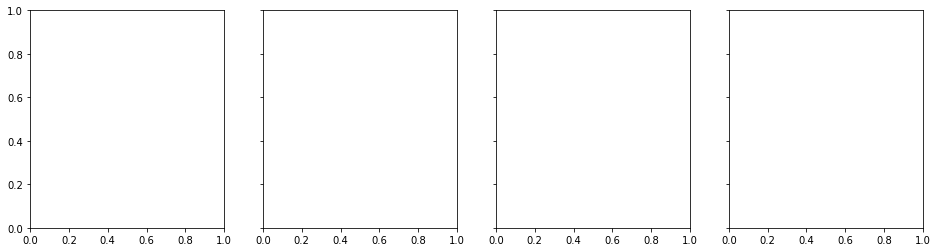

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(16,4), sharey=True)

axs[0].plot(range(0,len(label_test_reg))[:50], label_test_reg[:50], color='#2c3e50', label="Expected")
axs[1].plot(range(0,len(label_test_reg))[:50], pred_dtr[:50], color='#2980b9', label='Decision Forest Tree')
axs[2].plot(range(0,len(label_test_reg))[:50], pred_rft[:50], color='#27ae60', label='Random Forest Regressor')
axs[3].plot(range(0,len(label_test_reg))[:50], pred_lnr[:50], color='#c0392b', label='Linear Regression')
fig.legend()
fig.suptitle("Regression Plotting")

In [18]:
df_hrb['date'] = pd.to_datetime(df_hrb['date']) 
df_hrb['date'] = df_hrb['date'].apply(datetime.toordinal)

In [19]:
df_hrb.head()

Company Industry Classification Code Indicator Name Indicator Value  \
0                                103020       Revenues         351.469   
1                                103020           COGS         438.765   
2                                103020           SG&A         138.036   
3                                103020            R&D            0.00   
4                                103020           EBIT        -225.332   

   SimFin ID Ticker                       _id    date  
0     506954    HRB  5be90b7707d0610510878b6a  732980  
1     506954    HRB  5be90b7707d0610510878b6b  732980  
2     506954    HRB  5be90b7707d0610510878b6c  732980  
3     506954    HRB  5be90b7707d0610510878b6d  732980  
4     506954    HRB  5be90b7707d0610510878b6e  732980

In [20]:
le = preprocessing.LabelEncoder()
encoded_label = le.fit_transform(df_hrb['Indicator Name'])

In [21]:
features_cls = df_hrb[['date','Indicator Value']]
features_cls = StandardScaler().fit_transform(features_cls)
labels_cls = encoded_label.reshape(-1,1)
# labels_cls = StandardScaler().fit_transform(labels_cls)

feature_train_cls, feature_test_cls, label_train_cls, label_test_cls = train_test_split(
    features_cls, labels_cls, test_size = 0.2)

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, object were all converted to float64 by StandardScaler.

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, object were all converted to float64 by StandardScaler.



In [22]:
features_cls

array([[-2.10796708, -0.17895906],
       [-2.10796708, -0.17632511],
       [-2.10796708, -0.18539889],
       ...,
       [ 1.82072358, -0.028373  ],
       [ 1.82170306, -0.18878233],
       [ 1.82170306, -0.0260369 ]])

In [23]:
def predict_cls_method(feature_train, label_train, feature_test, label_test, model):
    model.fit(feature_train,label_train)
    predict_output = model.predict(feature_test)
    return accuracy_score(label_test,predict_output), predict_output

In [24]:
acc_score_knn, pred_knn = predict_cls_method(feature_train_cls, label_train_cls, feature_test_cls, label_test_cls,
                                            KNeighborsClassifier(n_neighbors = 10))
print('Accuracy score for K Neighbors Classfier :',acc_score_knn)

acc_score_svm, pred_svm = predict_cls_method(feature_train_cls, label_train_cls, feature_test_cls, label_test_cls,
                                            SVC())
print('\nAccuracy score for SVM :',acc_score_svm)

acc_score_dtc, pred_dtc = predict_cls_method(feature_train_cls, label_train_cls, feature_test_cls, label_test_cls,
                                            DecisionTreeClassifier())
print('\nAccuracy score for Decision Tree Classifier :',acc_score_dtc)

acc_score_rfc, pred_rfc = predict_cls_method(feature_train_cls, label_train_cls, feature_test_cls, label_test_cls,
                                            RandomForestClassifier(n_estimators = 50, max_depth = 10))
print('\nAccuracy score for Random Forest Classifier :',acc_score_rfc)

C:\Users\Ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy score for K Neighbors Classfier : 0.7105960264900663


C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.




Accuracy score for SVM : 0.7185430463576159

Accuracy score for Decision Tree Classifier : 0.7947019867549668


C:\Users\Ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




Accuracy score for Random Forest Classifier : 0.7768211920529802


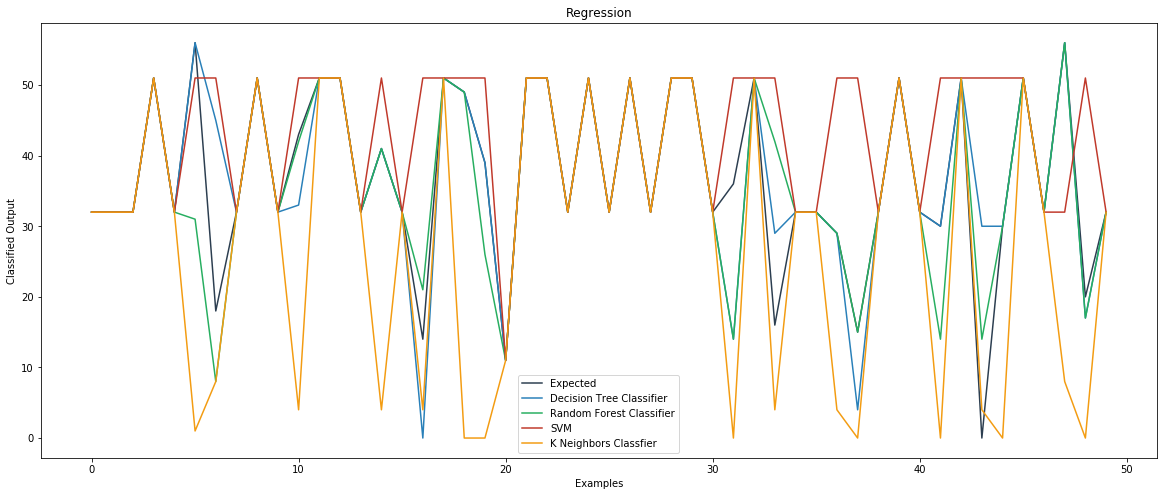

In [25]:
plt.figure(figsize=(20,8))
plt.plot(range(0,len(label_test_cls))[:50], label_test_cls[:50], color='#2c3e50', label='Expected')
plt.plot(range(0,len(label_test_cls))[:50], pred_dtc[:50], color='#2980b9', label='Decision Tree Classifier')
plt.plot(range(0,len(label_test_cls))[:50], pred_rfc[:50], color='#27ae60', label='Random Forest Classifier')
plt.plot(range(0,len(label_test_cls))[:50], pred_svm[:50], color='#c0392b', label='SVM')
plt.plot(range(0,len(label_test_cls))[:50], pred_knn[:50], color='#f39c12', label='K Neighbors Classfier')

plt.title('Regression')
plt.xlabel('Examples')
plt.ylabel('Classified Output')
plt.legend()
plt.show()

In [26]:
label_test_cls

array([[32],
       [32],
       [32],
       ...,
       [32],
       [32],
       [51]])

Text(0.5, 0.98, 'Categorical Plotting')

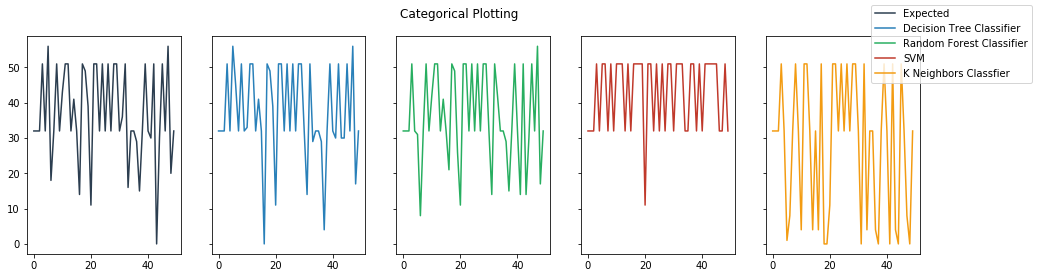

In [27]:
fig, axs = plt.subplots(1, 5, figsize=(16,4), sharey=True)

axs[0].plot(range(0,len(label_test_cls))[:50], label_test_cls[:50], color='#2c3e50', label="Expected")
axs[1].plot(range(0,len(label_test_cls))[:50], pred_dtc[:50], color='#2980b9', label='Decision Tree Classifier')
axs[2].plot(range(0,len(label_test_cls))[:50], pred_rfc[:50], color='#27ae60', label='Random Forest Classifier')
axs[3].plot(range(0,len(label_test_cls))[:50], pred_svm[:50], color='#c0392b', label='SVM')
axs[4].plot(range(0,len(label_test_cls))[:50], pred_knn[:50], color='#f39c12', label='K Neighbors Classfier')

fig.legend()
fig.suptitle("Categorical Plotting")

In [28]:
KM_df_all = df_all[['growth','debt','health','price']]
KM_df_all = pd.DataFrame(StandardScaler().fit_transform(KM_df_all), columns=KM_df_all.columns)
KM_df_all.head()

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype float64, object were all converted to float64 by StandardScaler.

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype float64, object were all converted to float64 by StandardScaler.



growth      debt    health     price
0  1.131674 -0.019035  0.108703 -0.041811
1  1.337264 -0.019040 -0.014332 -0.041058
2  1.304612 -0.019036 -0.056808 -0.041933
3  1.156768 -0.019043  0.000682 -0.039764
4  1.106278 -0.019041 -0.265161 -0.039852

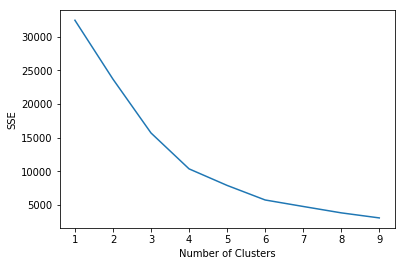

In [29]:
wcss = {}

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(KM_df_all)
    wcss[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 4).fit(KM_df_all)
KM_all_clusters = kmeans.predict(KM_df_all)
KM_df_all['clusters'] = KM_all_clusters
KM_df_all.head()

growth      debt    health     price  clusters
0  1.131674 -0.019035  0.108703 -0.041811         0
1  1.337264 -0.019040 -0.014332 -0.041058         0
2  1.304612 -0.019036 -0.056808 -0.041933         0
3  1.156768 -0.019043  0.000682 -0.039764         0
4  1.106278 -0.019041 -0.265161 -0.039852         0

C:\Users\Ankit\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



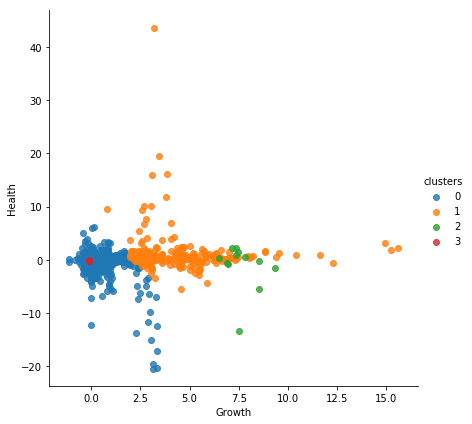

In [31]:
ax = sns.lmplot(data = KM_df_all, x='growth', y='health', hue='clusters', fit_reg=False, legend=True, size=6)
ax.set(xlabel='Growth', ylabel='Health')
plt.show()

In [32]:
KM_df_hrb = df_hrb[['Indicator Name','Indicator Value','date']]
KM_df_hrb['Indicator Name'] = le.fit_transform(KM_df_hrb['Indicator Name'])

KM_df_hrb = pd.DataFrame(StandardScaler().fit_transform(KM_df_hrb), columns=KM_df_hrb.columns)
KM_df_hrb.head()

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int32, int64, object were all converted to float64 by StandardScaler.

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int32, int64, object were all converted to float64 by StandardScaler.



Indicator Name  Indicator Value      date
0        0.808702        -0.178959 -2.107967
1       -2.429290        -0.176325 -2.107967
2        0.884005        -0.185399 -2.107967
3        0.432192        -0.189564 -2.107967
4       -1.450362        -0.196363 -2.107967

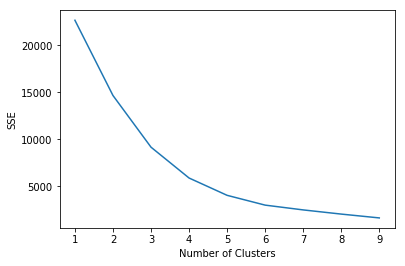

In [33]:
wcss = {}

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(KM_df_hrb)
    wcss[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [34]:
kmeans = KMeans(n_clusters = 4).fit(KM_df_hrb)
KM_all_clusters = kmeans.predict(KM_df_hrb)
KM_df_hrb['clusters'] = KM_all_clusters
KM_df_hrb.head()

Indicator Name  Indicator Value      date  clusters
0        0.808702        -0.178959 -2.107967         0
1       -2.429290        -0.176325 -2.107967         2
2        0.884005        -0.185399 -2.107967         0
3        0.432192        -0.189564 -2.107967         0
4       -1.450362        -0.196363 -2.107967         2

C:\Users\Ankit\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



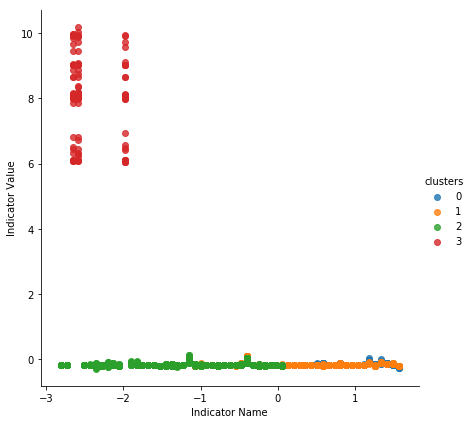

In [35]:
ax = sns.lmplot(data = KM_df_hrb, x='Indicator Name', y='Indicator Value', hue='clusters', fit_reg=False, legend=True, size=6)
ax.set(xlabel='Indicator Name', ylabel='Indicator Value')
plt.show()

In [36]:
df_aapl.head()

Company Industry Classification Code                   Indicator Name  \
0                                101001  Avg. Diluted Shares Outstanding   
1                                101001                         Revenues   
2                                101001                             COGS   
3                                101001                             SG&A   
4                                101001                              R&D   

  Indicator Value  SimFin ID Ticker                       _id        date  
0      6322169.00     111052   AAPL  5be90b7807d0610510879e75  2008-06-30  
1         7464.00     111052   AAPL  5be90b7807d0610510879e76  2008-06-30  
2         4864.00     111052   AAPL  5be90b7807d0610510879e77  2008-06-30  
3          916.00     111052   AAPL  5be90b7807d0610510879e78  2008-06-30  
4          292.00     111052   AAPL  5be90b7807d0610510879e79  2008-06-30

In [37]:
df_indicator = df_aapl.groupby('Indicator Name').aggregate({'Indicator Name':'count'})

fig = go.Figure(
    data=[
        go.Pie(
            labels=df_indicator.index,
            values=df_indicator['Indicator Name']
        )
    ]
)
fig.show()

In [38]:
df_nvda.head()

Company Industry Classification Code                   Indicator Name  \
0                                101004    Avg. Basic Shares Outstanding   
1                                101004  Avg. Diluted Shares Outstanding   
2                                101004    Avg. Basic Shares Outstanding   
3                                101004  Avg. Diluted Shares Outstanding   
4                                101004    Avg. Basic Shares Outstanding   

  Indicator Value  SimFin ID Ticker                       _id        date  
0       543807.00     172199   NVDA  5be90b7707d0610510878ba3  2007-10-31  
1       564536.00     172199   NVDA  5be90b7707d0610510878ba4  2007-10-31  
2    -1652676.496     172199   NVDA  5be90b7807d0610510878dbc  2008-01-31  
3    -1769277.496     172199   NVDA  5be90b7807d0610510878dbd  2008-01-31  
4         542.307     172199   NVDA  5be90b7807d0610510879c50  2008-04-30

In [39]:
fig = go.Figure(data=[
    
    go.Bar(
        name='AAPL',
        x=df_aapl['Indicator Name'],
        y=df_aapl['Indicator Value'].value_counts()
    ),
    go.Bar(
        name='NVDA',
        x=df_nvda['Indicator Name'],
        y=df_nvda['Indicator Value'].value_counts()
    )
])
fig.layout.update(barmode='stack')
fig.show()

In [40]:
len(df_aapl)

7852

In [41]:
data = []
for name in df_nvda['Indicator Name'].unique():
        trace= {
            'type':'bar',
            'name':name,
            'x':df_nvda[df_nvda['Indicator Name']==name]['date'],
            'y':df_nvda[df_nvda['Indicator Name']==name]['Indicator Value'],
            'text':df_nvda[df_nvda['Indicator Name']==name]['date']
        }
        data.append(trace)
layout = {
    'xaxis':{'title':'X-axis'},
    'yaxis':{'title':'Y-axis'},
    'barmode':'relative',
    'title':'Indicator names and values on respective dates for NVDA'
}
py.iplot({'data':data,'layout':layout})

In [42]:
data = [go.Scatter3d(
    x=df_all['debt'],
    y=df_all['growth'],
    z=df_all['health'],
    mode='markers',
    marker = dict(
        color = 'rgb(0, 0, 255)',
        size = 4,
        symbol='circle',
        line=dict(
            color='rgb(217, 217, 217)',
            width=1
        ),
        opacity = 0.9
    )
)]

layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)